<a href="https://colab.research.google.com/github/Prrriiitam/Loan_Credit_Risk/blob/main/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv('/content/drive/MyDrive/German_Credit/german_credit_data.csv')

In [39]:
print(df.columns)

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [40]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [41]:
df.drop('Unnamed: 0', axis = 1, inplace = True)


In [42]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [44]:
df.duplicated().sum()

np.int64(0)

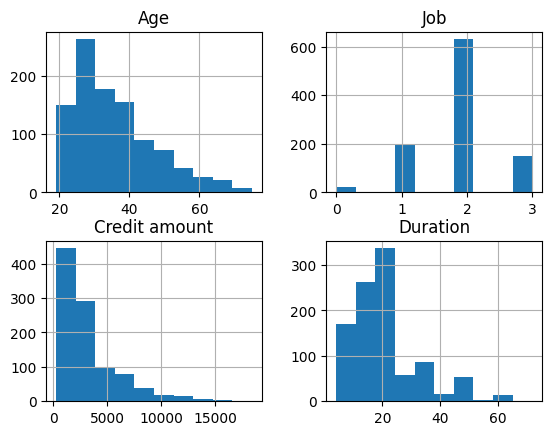

In [45]:
df.hist()
plt.show()

We have fix sav acc and checking acc

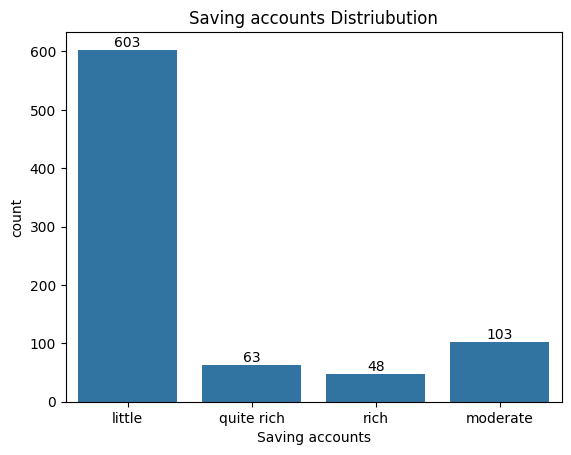

In [17]:
plt.title('Saving accounts Distriubution')
sns.countplot(x='Saving accounts', data=df)  # tells it to count how many times each category appears in the Saving accounts
for c in plt.gca().containers:  #This code is adding value labels (numbers) on top of each bar in the bar chart.
    plt.gca().bar_label(c)
plt.show()

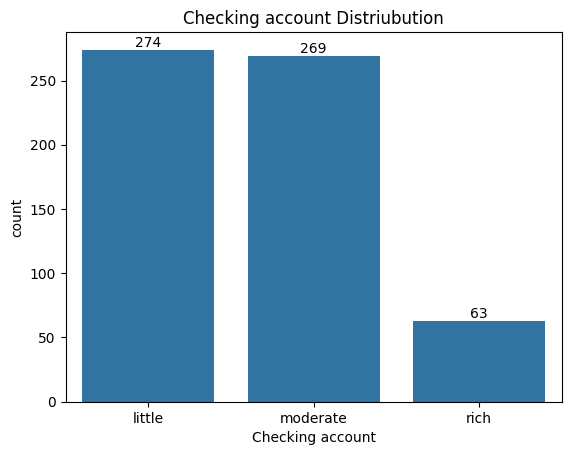

In [18]:
plt.title('Checking account Distriubution')
sns.countplot(x='Checking account', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

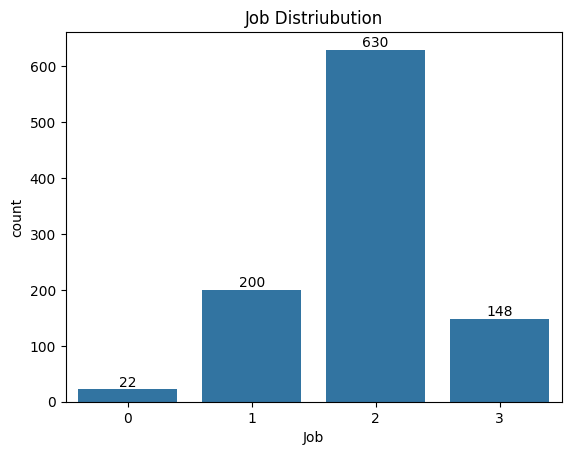

In [19]:
plt.title('Job Distriubution')
sns.countplot(x='Job', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

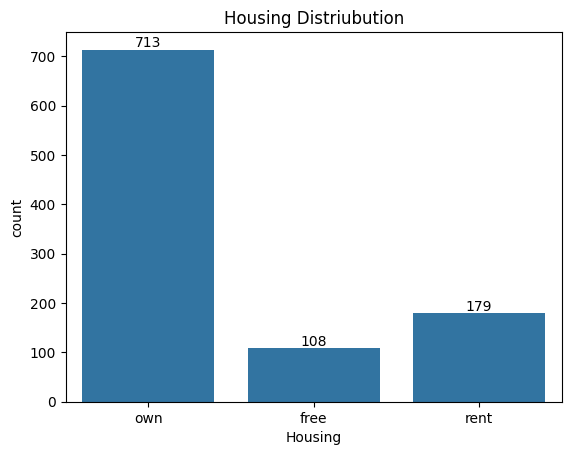

In [20]:
plt.title('Housing Distriubution')
sns.countplot(x='Housing', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

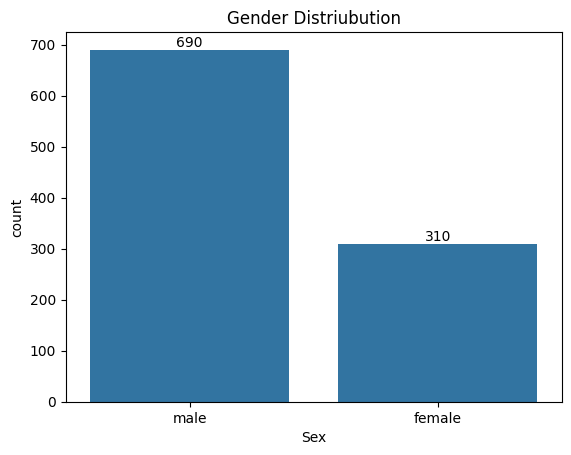

In [21]:
plt.title('Gender Distriubution')
sns.countplot(x='Sex', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.show()

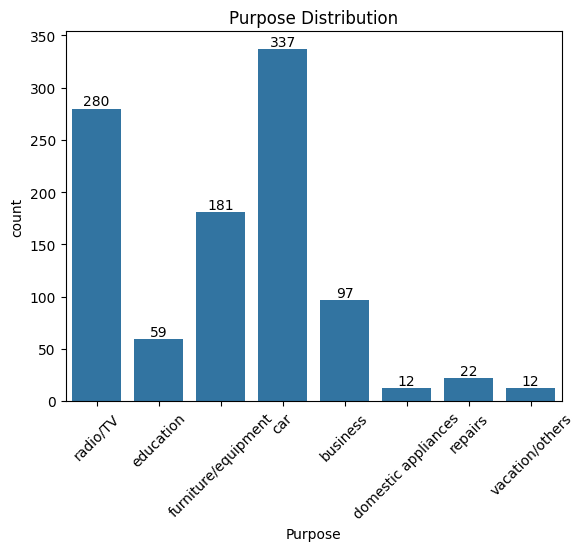

In [24]:
plt.title('Purpose Distribution')
sns.countplot(x='Purpose', data=df)
for c in plt.gca().containers:
    plt.gca().bar_label(c)
plt.xticks(rotation=45)
plt.show()

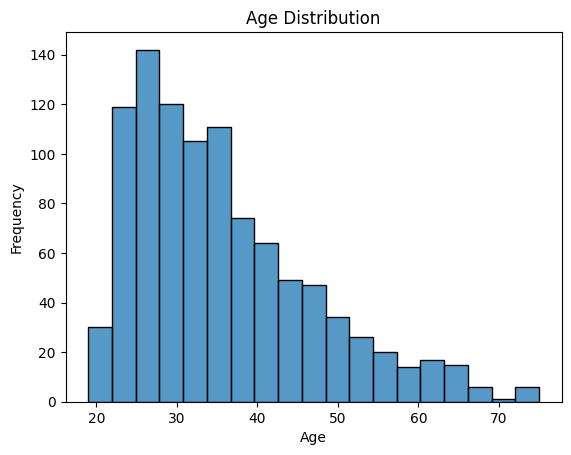

In [26]:
plt.title('Age Distribution')
sns.histplot(data=df, x='Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

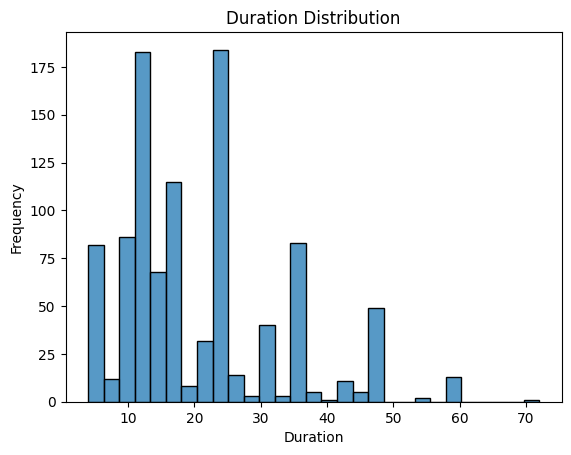

In [27]:
plt.title('Duration Distribution')
sns.histplot(data=df, x='Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [46]:
modal_val = df['Saving accounts'].mode()[0]
df['Saving accounts'].fillna(modal_val, inplace=True)

# df['Saving accounts'].mode() returns a Series of the most common values.
# [0] picks the first mode (if there’s a tie, only the first is used).

# Replaces all NaN (null) values in the Saving accounts column with modal_val.
# inplace=True means it changes the original DataFrame directly (doesn’t create a copy).


modal_val = df['Checking account'].mode()[0]
df['Checking account'].fillna(modal_val, inplace=True)

<ipython-input-46-4bfe254f0eaf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna(modal_val, inplace=True)
<ipython-input-46-4bfe254f0eaf>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


#Now we will fix label data to numerical data

In [48]:
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [49]:
cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
# fit_transform() does two things:
#  1. Fits the encoder on the column (i.e., learns all unique labels).
#  2. Transforms those labels into numbers.



In [50]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


#Now we will do scaling this is necessary for this types of projects where there are numerical data if we donot do this then features with large values may dominate.

In [51]:
# standardize the data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# fit_transform() does two things:
# Calculates the mean and standard deviation of each column (fit)
# Applies the transformation (transform):

#Preprocessing is done now clustering

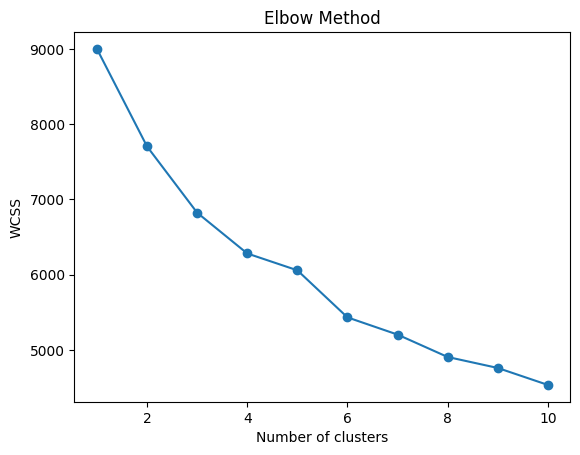

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# We have checked that what should be optimal number of clusters by elbow method and its shows robably 3-4 as in the above plot 1-2-3 decreses sharply but from 3-4 its starts to be flatten so optimally 3-4 but here in this project we have to classify persons with either good or bad credit risk so here we will use number of clusters = 2.

In [52]:
# using K-Means clustering model with 2 clusters

model = KMeans(n_clusters=2)
model.fit(df_scaled)

#Fits the model on your scaled dataset df_scaled. This is when the clustering happens — KMeans finds 2 centroids and assigns each data point to the nearest one.

KMeans(n_clusters=2)

In [53]:
labels = model.labels_
df_clustered = pd.concat([df, pd.DataFrame({'Risk':labels})], axis = 1)
df_clustered.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,1


cluster 0 = low risk
cluster 1 = high risk
KMeans assigns cluster numbers arbitrarily — so 0 doesn't always mean "good", and 1 doesn't always mean "bad".